In [1]:
library(AER)
library(readxl)
library(xts)
library(zoo)
#library(dynlm)

Warning message:
"package 'AER' was built under R version 3.6.3"
Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.6.3"


Loading required package: lmtest

Warning message:
"package 'lmtest' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 3.6.3"
Loading required package: survival

Warning message:
"package 'survival' was built under R version 3.6.3"
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 



In [2]:
UK_GDP = read_excel('UK_GDPpc_Quarterly-Full.xls')

head(UK_GDP, 5)
tail(UK_GDP)

Date,GDPpc
1955 Q1,2289
1955 Q2,2289
1955 Q3,2333
1955 Q4,2318
1956 Q1,2342


Date,GDPpc
2019 Q2,8101
2019 Q3,8115
2019 Q4,8115
2020 Q1,7898
2020 Q2,6324
2020 Q3,7296


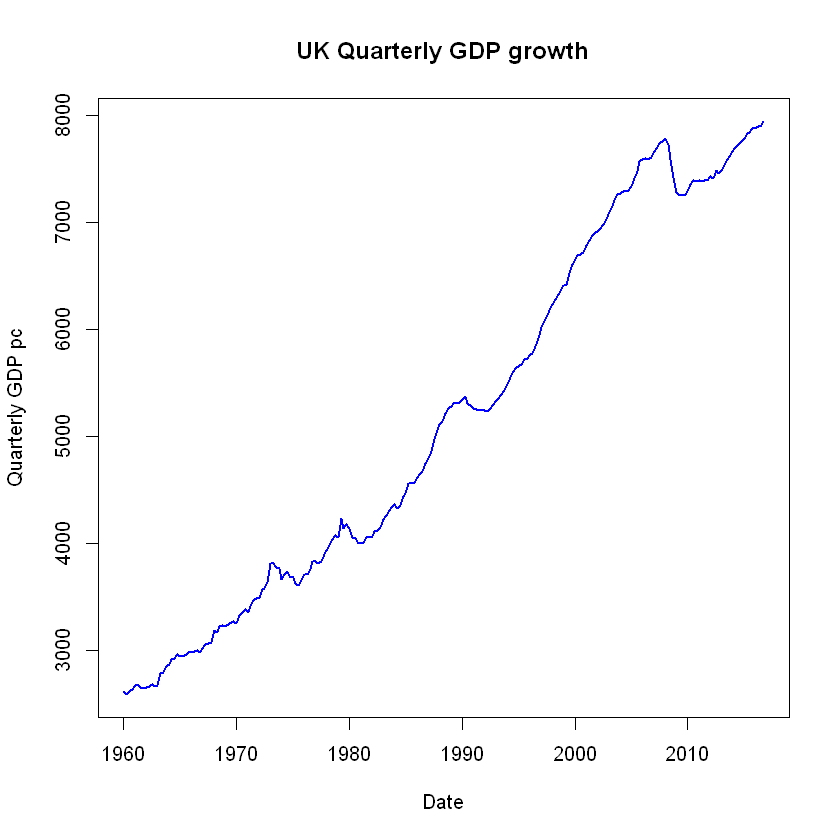

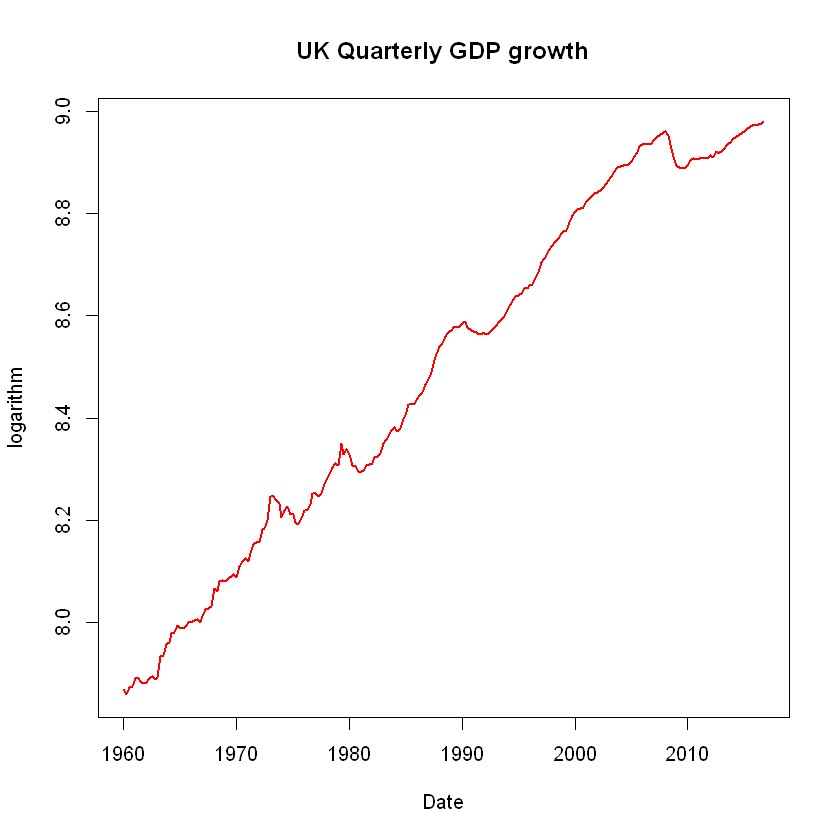

In [3]:
#Reformat the dates into a year, quarter format
UK_GDP$Date = as.yearqtr(UK_GDP$Date, format = "%Y Q%q")
#select year 1960-2016 and convert into timeseries
GDP_xts = xts(UK_GDP$GDPpc, UK_GDP$Date)["1960::2016"]

#plot timeseries of GDP quarterly growth and its logarith
plot(as.zoo(GDP_xts), col = 'blue',
    lwd = 2,
    ylab = 'Quarterly GDP pc',
    xlab = 'Date',
    main = 'UK Quarterly GDP growth')

plot(as.zoo(log(GDP_xts)), col = 'red',
    lwd = 2,
    ylab = 'logarithm',
    xlab = 'Date',
    main = 'UK Quarterly GDP growth')

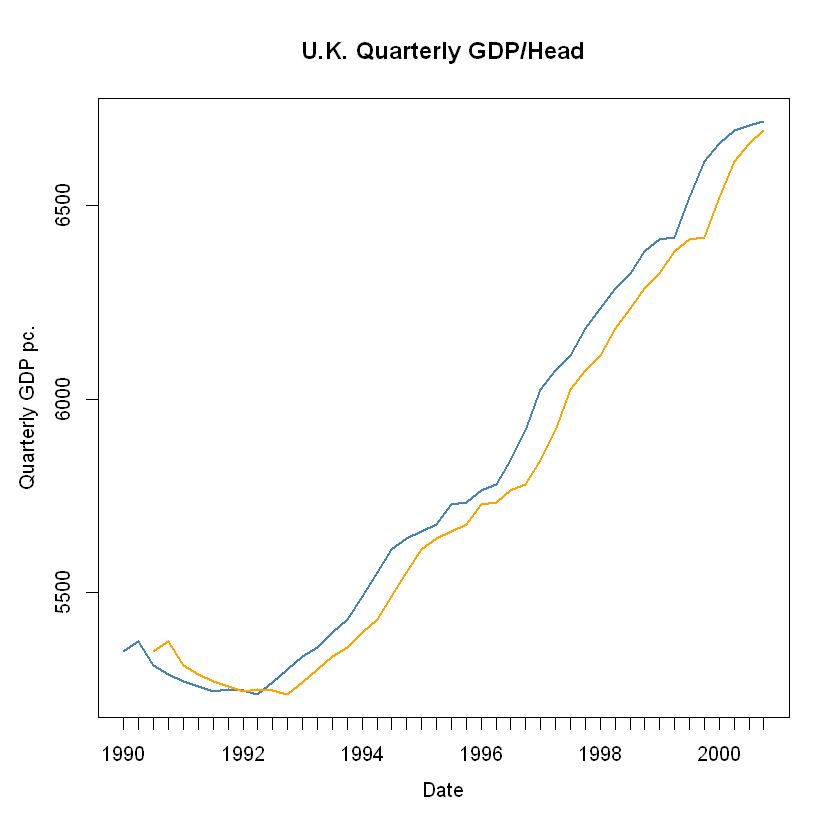

In [4]:
#select 10 year sample(1990-2000) and add a lag of two
GDP_10year_sample = xts(UK_GDP$GDPpc, UK_GDP$Date)["1990::2000"]
GDP_10year_sample_lag2 = lag(GDP_10year_sample, 2)

#plot for given time frame 
plot(as.zoo(GDP_10year_sample), col = "steelblue",
     lwd = 2,
     ylab = "Quarterly GDP pc.",
     xlab = "Date",
     mgp = c(2.5, 1, 0),
     mar= c(3,3,3,3), 
     width=5,
     height=5,
     main = "U.K. Quarterly GDP/Head")
#gives additoal plot of lags
lines(as.zoo(GDP_10year_sample_lag2),
      type = "l", lwd =2,
      col = "orange")

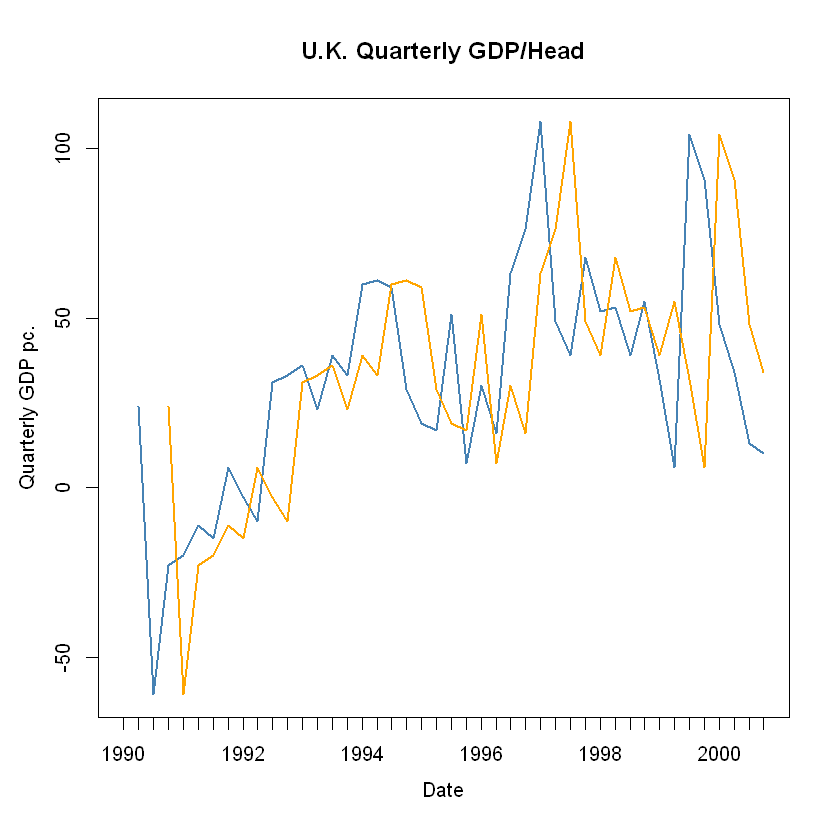

In [5]:
#use the 10 year sample while adding a first difference and a lag of 2
GDP_diff_xts = diff(GDP_10year_sample)
GDP_diff_lag1 = lag(GDP_diff_xts, 2)

plot(as.zoo(GDP_diff_xts), col = "steelblue",
     lwd = 2,
     ylab = "Quarterly GDP pc.",
     xlab = "Date",
     mgp = c(2.5, 1, 0),
     mar= c(3,3,3,3), 
     width=5,
     height=5,
     main = "U.K. Quarterly GDP/Head")

lines(as.zoo(GDP_diff_lag1),
      type = "l", lwd =2,
      col = "orange")

In [6]:
#calculate annulised growth and finding its lograithm 
GDP_quantities =  data.frame('Level'= GDP_xts , 'Log'= log(GDP_xts),
                'Annualised Growth' = 400 * log(GDP_xts/lag(GDP_xts)), 
                'Annualised Growth Lag' = lag(400 * log(GDP_xts/lag(GDP_xts))))

#create a function to find these quantities more easily 
quants = function(series) {
    s = series
    return(
        data.frame('Level'= s , 'Log'= log(s),
                'Annualised Growth' = 400 * log(s/lag(s)), 
                'Annualised Growth Lag' = lag(400 * log(s/lag(s))))
    )
}
head(GDP_quantities)

,Level,Log,Annualised.Growth,Annualised.Growth.Lag
1960 Q1,2613,7.868254,NA,NA
1960 Q2,2588,7.858641,-3.8454440,NA
1960 Q3,2622,7.871693,5.2208035,-3.845444
1960 Q4,2632,7.875499,1.5226512,5.220803
1961 Q1,2670,7.889834,5.7337836,1.522651
1961 Q2,2675,7.891705,0.7483632,5.733784


In [7]:
head(quants(GDP_xts))

,Level,Log,Annualised.Growth,Annualised.Growth.Lag
1960 Q1,2613,7.868254,NA,NA
1960 Q2,2588,7.858641,-3.8454440,NA
1960 Q3,2622,7.871693,5.2208035,-3.845444
1960 Q4,2632,7.875499,1.5226512,5.220803
1961 Q1,2670,7.889834,5.7337836,1.522651
1961 Q2,2675,7.891705,0.7483632,5.733784


In [8]:
#calculates the quantities for 1990-2005
GDP_1990_2005 = GDP_xts["1990::2005"]
GDP_1990_2005_quants = quants(GDP_1990_2005)
GDPGR_xts = xts(400 * log(GDP_xts/lag(GDP_xts))) 
GDPGR_1990_2005 = GDPGR_xts["1990::2005"]

In [12]:
GDP_quants_omit = na.omit(GDP_1990_2005_quants) #remove unecessary veriables from object 
head(GDP_quants_omit)
autocov1 = cov(GDP_quants_omit['Annualised.Growth'], GDP_quants_omit['Annualised.Growth.Lag']) #calculate autocoveriance
var_Y = var(GDP_quants_omit['Annualised.Growth']) #calculate variqnce of Y

print(autocov1, var_Y)

,Level,Log,Annualised.Growth,Annualised.Growth.Lag
1990 Q3,5311,8.577535,-4.5680549,1.7910478
1990 Q4,5288,8.573195,-1.7360156,-4.5680549
1991 Q1,5268,8.569406,-1.5157275,-1.7360156
1991 Q2,5257,8.567316,-0.8361048,-1.5157275
1991 Q3,5242,8.564458,-1.1429668,-0.8361048
1991 Q4,5248,8.565602,0.4575787,-1.1429668


                  Annualised.Growth.Lag
Annualised.Growth                 2.407


In [13]:
#estimates autocorrelation automatically 
acf(GDPGR_xts["1990::2005"], lag.max = 4, plot = F) 


Autocorrelations of series 'GDPGR_xts["1990::2005"]', by lag

 0.00  0.25  0.50  0.75  1.00 
1.000 0.565 0.336 0.167 0.134 

In [14]:
# Compute these autocorrelations for 1965-1990:
acf(GDPGR_xts["1965::1990"], lag.max = 4, plot = F)
# Compute these autocorrelations for 2005-2020
acf(GDPGR_xts["2005::2020"], lag.max = 4, plot = F)


Autocorrelations of series 'GDPGR_xts["1965::1990"]', by lag

  0.00   0.25   0.50   0.75   1.00 
 1.000 -0.009  0.085  0.185 -0.100 


Autocorrelations of series 'GDPGR_xts["2005::2020"]', by lag

  0.00   0.25   0.50   0.75   1.00 
 1.000  0.668  0.476  0.115 -0.025 